In [1]:
from numpy import *
import os
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec
import astropy
import pandas as pd
from astropy.io import fits
from astropy.table import Table
from astropy.visualization import astropy_mpl_style
from astropy.utils.data import get_pkg_data_filename

plt.style.use(astropy_mpl_style)

In [1]:
10**9.75/10**10.32

0.2691534803926914

In [2]:
path = os.path.expanduser('~/Desktop/Data/')
os.path.exists(path)

True

In [3]:
def cbar(mappable, extend='neither', minorticklength=8,majorticklength=10, minortickwidth=2,\
        majortickwidth=2.5, pad=0.2, side='right', orientation='vertical'):
    ax = mappable.axes
    fig=ax.figure
    divider=make_axes_locatable(ax)
    cax=divider.append_axes(side,size='5%',pad=pad)
    cbar=fig.colorbar(mappable,cax=cax,entend=extend,orientation=orientation)
    cbar.ax.tick_params(which='major',length=majorticklength,width=majortickwidth)
    cbar.ax.tick_params(which='minor',length=minorticklength,width=minortickwidth)
    cbar.solids.set_edgecolor('face')
    return cbar

In [4]:
FilterH=Table.read('3DHST_MAGPHYS_FILTER_FILE',format='ascii')
FilterH=FilterH.to_pandas()
FilterH

,col1,col2,col3,col4,col5
0,<NA>,Name,$\lambda_c$,Filter ID,Fit?
1,0,U38,0.3637,249,1
2,1,U,0.375,363,1
3,2,IA427,0.426,265,1
4,3,F435W,0.4318,214,1
5,4,IA445,0.4443,205,1
6,5,B,0.4563,250,1
7,6,IA505,0.5061,268,1
8,7,IA527,0.5259,269,1
9,8,V,0.5396,251,1


In [5]:
Filter=Table.read('Megatron.csv',format='ascii')
Filter=Filter.to_pandas()
Filter

,Name,$\lambda_c$,Filter ID,Fit?
0,WFI_U38,0.3686,249,1
1,U,0.3749,363,1
2,B,0.4318,214,1
3,IA484,0.4847,267,1
4,IA527,0.5259,269,1
5,WFI_V,0.5376,251,1
6,IA574,0.5763,270,1
7,V,0.5919,215,1
8,IA598,0.6007,568,1
9,IA624,0.6231,271,1


In [6]:
HST=Table.read('3DHST_Observation_file_2.5-4.csv',format='ascii')
HST=HST.to_pandas()
HST

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,...,col74,col75,col76,col77,col78,col79,col80,col81,col82,col83
0,<NA>,id,redshift,U38,U38*,U,U*,IA427,IA427*,F435W,...,Ks,Ks*,IRAC1,IRAC1*,IRAC2,IRAC2*,IRAC3,IRAC3*,IRAC4,IRAC4*
1,5,486,2.8325,3.6326999999999994e-07,1.49529e-07,1.56306e-07,2.2917e-08,5.55976e-07,1.36659e-07,-9.9e-05,...,-9.9e-05,-9.9e-05,1.7121175e-05,6.55795e-07,2.0053149999999996e-05,4.6577699999999995e-07,2.1063057e-05,1.644496e-06,1.4879789e-05,1.2352389999999999e-06
2,6,527,2.6373,5.88369e-07,1.65991e-07,9.058439999999999e-07,2.404e-08,1.9412939999999998e-06,1.6754799999999999e-07,-9.9e-05,...,-9.9e-05,-9.9e-05,1.1235221999999999e-05,8.57336e-07,1.0948309999999999e-05,6.22424e-07,3.0371619999999997e-06,2.1734309999999996e-06,5.8377049999999995e-06,1.652584e-06
3,21,749,3.3501999999999996,-1.5608999999999998e-08,1.5998299999999998e-07,1.83434e-07,1.7393e-08,5.22362e-07,1.36551e-07,4.57486e-07,...,-9.9e-05,-9.9e-05,6.043756e-06,5.78835e-07,7.763245e-06,5.04392e-07,3.671512e-06,1.69952e-06,5.022048999999999e-06,1.3706640000000001e-06
4,31,946,3.39876,3.926e-08,1.7202799999999998e-07,-9.454e-09,1.6046999999999998e-08,-1.83968e-07,1.5751100000000001e-07,4.9559999999999995e-08,...,-9.9e-05,-9.9e-05,1.2625025e-05,2.53427e-07,1.6283739e-05,3.4762e-07,9.977994e-06,1.560119e-06,1.3449925e-05,1.3297259999999998e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2047,12074,30396,3.51017,6.2657e-08,8.9928e-08,4.587e-09,1.1376e-08,5.25023e-07,1.41921e-07,4.6900999999999994e-07,...,-9.9e-05,-9.9e-05,1.136205e-06,3.40135e-07,1.4681409999999998e-06,2.34555e-07,2.1780499999999998e-07,1.194971e-06,1.13177e-06,1.041489e-06
2048,12077,30421,2.96699,4.92164e-07,1.0309099999999999e-07,6.12271e-07,1.3447e-08,1.038842e-06,1.36579e-07,1.015827e-06,...,-9.9e-05,-9.9e-05,4.626565e-06,4.12727e-07,4.264688e-06,3.3995199999999997e-07,3.326148e-06,1.1683689999999999e-06,1.0867279999999998e-06,9.368999999999999e-07
2049,12096,30662,2.82659,6.41095e-07,1.4020699999999998e-07,4.0264899999999994e-07,1.8957000000000002e-08,6.89334e-07,1.77641e-07,6.154469999999999e-07,...,-9.9e-05,-9.9e-05,5.259699e-06,4.4846799999999994e-07,5.915993e-06,3.78151e-07,8.161974999999999e-06,1.3455919999999999e-06,6.906025e-06,1.064318e-06
2050,12107,30781,2.62456,4.3323256999999995e-05,9.7481e-08,6.766381199999999e-05,1.3577e-08,0.000101566214,1.28697e-07,5.2243787999999997e-05,...,-9.9e-05,-9.9e-05,0.000240914003,3.31781e-07,0.000281678354,2.8952099999999994e-07,0.000311530971,1.146288e-06,0.000375084049,8.37303e-07


In [55]:
# ZFOURGE=Table.read('Montague_zspec_snr20.csv',format='ascii')
ZFOURGE=Table.read('Ksall-Forrest-Hayley.csv',format='ascii')
HayleyWilliams=ZFOURGE.to_pandas()
HayleyWilliams

,id,redshift,Ksall,Ksall*,WFI_U38,WFI_U38*,U,U*,B,B*,...,KsHI,KsHI*,IRAC_36,IRAC_36*,IRAC_45,IRAC_45*,IRAC_58,IRAC_58*,IRAC_80,IRAC_80*
0,5860,2.21767,0.000019,2.836337e-07,6.337929e-07,1.646498e-07,5.641337e-07,1.401425e-08,8.298643e-07,5.970228e-08,...,0.000019,1.878084e-07,0.000034,8.594808e-08,0.000041,1.193747e-07,0.000048,8.507794e-07,5.019928e-05,1.049104e-06
1,5864,1.80828,0.000020,2.213108e-07,-8.087607e-08,1.503628e-07,2.904763e-08,1.279602e-08,1.076296e-08,4.422416e-08,...,0.000020,1.611082e-07,0.000035,8.291567e-08,0.000040,1.127840e-07,0.000031,8.465849e-07,2.061580e-05,1.020953e-06
2,5880,1.83162,0.000007,2.517474e-07,7.018275e-07,1.665095e-07,9.429156e-07,1.417908e-08,1.181943e-06,6.119616e-08,...,0.000007,1.999600e-07,0.000012,8.579655e-08,0.000014,1.198925e-07,0.000011,8.579306e-07,9.694611e-06,1.046614e-06
3,5886,1.10100,0.000009,2.932844e-07,2.569235e-06,2.243764e-07,2.656272e-06,1.829424e-08,2.611979e-06,6.367431e-08,...,0.000010,2.448848e-07,0.000011,9.458067e-08,0.000009,1.314405e-07,0.000007,9.794239e-07,3.420668e-06,1.148579e-06
4,5928,0.71540,0.000006,1.663104e-07,4.118565e-08,1.217481e-07,1.319067e-07,1.045031e-08,1.163930e-07,3.599286e-08,...,0.000006,1.343051e-07,0.000007,9.875717e-08,0.000006,1.364314e-07,0.000002,1.006612e-06,-1.219286e-07,1.165247e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5407,30728,1.01495,0.000020,6.514118e-07,6.932725e-07,1.741941e-07,1.938663e-07,1.899032e-08,8.137671e-08,5.773845e-08,...,-0.000099,-9.900000e-05,0.000035,1.569066e-07,0.000030,1.698451e-07,0.000022,1.329149e-06,2.298322e-05,1.200962e-06
5408,30734,1.61784,0.000010,3.461743e-07,2.065333e-06,1.625653e-07,1.980692e-06,1.442379e-08,2.204990e-06,5.550339e-08,...,0.000010,7.318687e-07,0.000012,1.114647e-07,0.000013,1.333991e-07,0.000012,9.525729e-07,9.041841e-06,9.602418e-07
5409,30781,2.62456,0.000124,4.357236e-07,5.159092e-05,1.367566e-07,7.141720e-05,1.213917e-08,4.927731e-05,4.635416e-08,...,0.000117,7.021154e-07,0.000224,1.121892e-07,0.000269,1.310152e-07,0.000336,9.391043e-07,4.027543e-04,9.491262e-07
5410,30810,1.49907,0.000012,3.679222e-07,2.706786e-06,1.941060e-07,2.341848e-06,1.700736e-08,2.748427e-06,6.516993e-08,...,0.000013,5.114900e-07,0.000015,1.159778e-07,0.000015,1.384354e-07,0.000012,9.775947e-07,8.942495e-06,1.007640e-06


In [56]:
comp_ew = Table.read(os.path.expanduser(path+'/EELG-stuff/comp_ew.dat'), format ='ascii')
xy = comp_ew.to_pandas()
pd.set_option('display.max_rows', 20)
# xy
xyz = xy[xy['col1']<100000]
stuff = xyz.drop(['col3','col4'],axis=1)
stuff.rename(columns={'col1':'id' ,'col2':'redshift'} ,inplace=True)
# stuff
EELGs=pd.merge(left=stuff['id'], right=HayleyWilliams, left_on='id', right_on='id')
EELGs #New redshifts are the redshift_y values

,id,redshift,Ksall,Ksall*,WFI_U38,WFI_U38*,U,U*,B,B*,...,KsHI,KsHI*,IRAC_36,IRAC_36*,IRAC_45,IRAC_45*,IRAC_58,IRAC_58*,IRAC_80,IRAC_80*
0,20366,3.53172,0.000001,7.810576e-08,-5.483530e-08,1.474157e-07,-1.920218e-08,1.451277e-08,7.295418e-08,4.555906e-08,...,0.000001,8.281339e-08,4.112125e-07,6.862928e-08,6.071316e-07,7.582515e-08,8.668196e-07,7.398355e-07,7.158663e-07,8.068668e-07
1,11462,3.81006,0.000001,8.088509e-08,-1.730741e-07,1.412119e-07,9.688624e-09,1.539731e-08,1.848744e-07,5.248104e-08,...,0.000001,7.503430e-08,1.032816e-06,5.747703e-08,1.045007e-06,7.816256e-08,1.214578e-06,5.568519e-07,7.637654e-08,7.231276e-07
2,12533,3.56800,0.000003,1.023268e-07,2.333313e-08,1.477947e-07,-7.224740e-09,1.570299e-08,2.574843e-07,3.538580e-08,...,0.000003,7.913625e-08,2.013745e-06,5.472700e-08,3.187537e-06,6.984398e-08,2.739770e-06,5.843974e-07,4.351360e-06,7.036131e-07
3,12552,3.19594,0.000002,1.004457e-07,2.037470e-07,1.582617e-07,3.017830e-08,1.451277e-08,2.027072e-07,4.905671e-08,...,0.000001,1.154762e-07,4.336314e-07,5.120638e-08,4.564604e-07,8.840882e-08,2.681679e-07,5.419443e-07,5.906111e-07,6.350032e-07
4,12903,3.09734,0.000001,7.722052e-08,-4.104241e-08,1.356079e-07,1.025226e-07,1.521109e-08,2.558894e-07,4.313636e-08,...,0.000001,7.887600e-08,4.230969e-07,5.300548e-08,4.440168e-07,5.839714e-08,-4.293243e-08,6.100103e-07,-1.528582e-06,7.586705e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,23511,2.53110,0.000002,1.337597e-07,2.185058e-07,1.326686e-07,4.220002e-08,1.319516e-08,3.272125e-07,3.325447e-08,...,0.000002,1.661526e-07,1.105822e-06,6.076241e-08,1.239654e-06,5.351259e-08,7.309251e-07,7.187574e-07,1.310132e-06,8.175869e-07
72,24259,3.50945,0.000004,1.870996e-07,2.870201e-07,1.222908e-07,-1.987640e-08,1.151945e-08,1.598638e-07,4.379015e-08,...,0.000003,2.130971e-07,1.125124e-06,6.486456e-08,1.580001e-06,5.684973e-08,1.516494e-06,8.260732e-07,1.083821e-06,9.146839e-07
73,26616,3.52112,0.000003,1.708135e-07,-9.196342e-08,1.400892e-07,-7.649950e-09,1.319020e-08,1.309476e-07,4.922996e-08,...,0.000003,2.545299e-07,1.576643e-06,9.733535e-08,1.860037e-06,1.062550e-07,1.256860e-06,8.000680e-07,2.121381e-06,9.078576e-07
74,27445,2.61569,0.000002,1.555559e-07,7.292188e-07,1.161839e-07,6.866668e-07,1.400810e-08,9.665539e-07,4.115271e-08,...,0.000002,1.599631e-07,3.056831e-06,7.022924e-08,2.395153e-06,6.562173e-08,3.934005e-06,7.159287e-07,3.368677e-06,8.262652e-07


In [57]:
Hmask1 = HayleyWilliams['redshift'] <4
Hmask2 = HayleyWilliams['redshift'] >2.5
Hmask=HayleyWilliams[Hmask1&Hmask2]
# Hmask
e1=Hmask['F105W']>0 
e2=Hmask['F125W']>0
e3=Hmask['J1']>0
e4=Hmask['Ksall']>0
e = Hmask[e1*e2*e3*e4]
e

/home/magnus/notebook/jupyterenv/lib/python3.8/site-packages/pandas/core/computation/expressions.py:203: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(


,id,redshift,Ksall,Ksall*,WFI_U38,WFI_U38*,U,U*,B,B*,...,KsHI,KsHI*,IRAC_36,IRAC_36*,IRAC_45,IRAC_45*,IRAC_58,IRAC_58*,IRAC_80,IRAC_80*
7,6020,2.50071,0.000020,3.096256e-07,-8.798456e-08,1.996094e-07,1.317023e-07,1.697357e-08,1.619148e-07,5.798884e-08,...,0.000019,1.642945e-07,0.000036,9.316101e-08,0.000042,1.308562e-07,4.510276e-05,8.591602e-07,0.000031,1.005342e-06
11,6235,2.77694,0.000003,1.496175e-07,-6.405574e-08,1.252773e-07,3.564296e-08,1.064518e-08,1.712112e-07,3.622527e-08,...,0.000003,1.054922e-07,0.000006,1.139906e-07,0.000009,1.580601e-07,3.350872e-06,1.061496e-06,0.000007,1.199949e-06
20,6329,2.55376,0.000004,1.748304e-07,8.459289e-08,1.687600e-07,3.748744e-08,1.504118e-08,1.158055e-07,5.068060e-08,...,0.000004,1.407463e-07,0.000007,1.041428e-07,0.000007,1.501724e-07,9.480485e-06,9.917280e-07,0.000007,1.166259e-06
28,6465,2.80100,0.000005,1.432856e-07,1.169858e-06,1.514148e-07,1.218726e-06,1.319788e-08,1.901193e-06,4.561431e-08,...,0.000005,1.207126e-07,0.000008,7.720992e-08,0.000009,1.030585e-07,1.135316e-05,6.973793e-07,0.000011,8.272973e-07
34,6525,2.87872,0.000005,2.155132e-07,-5.787541e-08,1.999688e-07,1.338292e-07,1.651759e-08,1.722115e-07,5.991826e-08,...,0.000005,1.616929e-07,0.000009,8.060144e-08,0.000012,1.110671e-07,1.224659e-05,7.972105e-07,0.000014,9.576137e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4014,23898,3.45609,0.000005,2.479044e-07,1.140478e-07,2.119413e-07,1.854450e-08,2.439224e-08,-1.932773e-08,7.478922e-08,...,0.000004,2.017701e-07,0.000012,7.928763e-08,0.000021,8.089391e-08,3.048605e-05,8.946349e-07,0.000042,8.978008e-07
4032,23957,2.56811,0.000003,1.158825e-07,-8.880608e-08,1.347558e-07,8.740874e-08,1.566731e-08,2.090859e-07,4.499811e-08,...,0.000003,1.116375e-07,0.000004,7.448925e-08,0.000004,8.019671e-08,4.393635e-06,8.011913e-07,0.000003,8.214542e-07
4080,24152,2.57530,0.000002,1.283884e-07,5.135372e-07,1.472262e-07,3.432513e-07,1.713190e-08,4.121669e-07,4.897208e-08,...,0.000002,1.247011e-07,0.000003,6.660773e-08,0.000003,6.992037e-08,6.907795e-07,7.379517e-07,0.000003,8.238800e-07
4122,24402,2.87243,0.000005,1.674245e-07,3.080376e-07,1.445627e-07,2.410842e-07,1.625941e-08,4.076687e-07,5.010055e-08,...,0.000005,1.290246e-07,0.000009,8.359158e-08,0.000013,8.608975e-08,1.709849e-05,7.949271e-07,0.000018,8.719162e-07


In [58]:
EELGs2=pd.merge(left=EELGs['id'], right=e, left_on='id', right_on='id',how='inner')
EELGs2

,id,redshift,Ksall,Ksall*,WFI_U38,WFI_U38*,U,U*,B,B*,...,KsHI,KsHI*,IRAC_36,IRAC_36*,IRAC_45,IRAC_45*,IRAC_58,IRAC_58*,IRAC_80,IRAC_80*
0,20366,3.53172,0.000001,7.810576e-08,-5.483530e-08,1.474157e-07,-1.920218e-08,1.451277e-08,7.295418e-08,4.555906e-08,...,0.000001,8.281339e-08,4.112125e-07,6.862928e-08,6.071316e-07,7.582515e-08,8.668196e-07,7.398355e-07,7.158663e-07,8.068668e-07
1,11462,3.81006,0.000001,8.088509e-08,-1.730741e-07,1.412119e-07,9.688624e-09,1.539731e-08,1.848744e-07,5.248104e-08,...,0.000001,7.503430e-08,1.032816e-06,5.747703e-08,1.045007e-06,7.816256e-08,1.214578e-06,5.568519e-07,7.637654e-08,7.231276e-07
2,12533,3.56800,0.000003,1.023268e-07,2.333313e-08,1.477947e-07,-7.224740e-09,1.570299e-08,2.574843e-07,3.538580e-08,...,0.000003,7.913625e-08,2.013745e-06,5.472700e-08,3.187537e-06,6.984398e-08,2.739770e-06,5.843974e-07,4.351360e-06,7.036131e-07
3,12552,3.19594,0.000002,1.004457e-07,2.037470e-07,1.582617e-07,3.017830e-08,1.451277e-08,2.027072e-07,4.905671e-08,...,0.000001,1.154762e-07,4.336314e-07,5.120638e-08,4.564604e-07,8.840882e-08,2.681679e-07,5.419443e-07,5.906111e-07,6.350032e-07
4,12903,3.09734,0.000001,7.722052e-08,-4.104241e-08,1.356079e-07,1.025226e-07,1.521109e-08,2.558894e-07,4.313636e-08,...,0.000001,7.887600e-08,4.230969e-07,5.300548e-08,4.440168e-07,5.839714e-08,-4.293243e-08,6.100103e-07,-1.528582e-06,7.586705e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44,11999,3.60300,0.000002,9.596709e-08,-2.619603e-07,1.549683e-07,-1.506245e-08,1.660254e-08,1.858932e-07,4.879452e-08,...,0.000002,8.304808e-08,1.563670e-06,5.838897e-08,1.681708e-06,8.907097e-08,1.718485e-06,5.514465e-07,3.461318e-06,7.134930e-07
45,12030,3.41318,0.000002,1.615623e-07,2.456920e-07,1.591347e-07,1.845423e-09,1.739433e-08,1.481252e-07,3.631431e-08,...,0.000002,8.707481e-08,1.023242e-06,7.163257e-08,8.819596e-07,1.056507e-07,1.766422e-06,6.295702e-07,-2.235906e-07,8.100758e-07
46,15111,2.98700,0.000002,8.291619e-08,-3.625589e-08,1.478849e-07,9.498587e-08,1.339367e-08,2.953282e-07,4.064219e-08,...,0.000002,8.408910e-08,1.223685e-06,4.553861e-08,1.306841e-06,4.825071e-08,2.242617e-06,5.082046e-07,1.136724e-06,5.751432e-07
47,16603,3.55653,0.000002,1.386666e-07,-1.395978e-08,1.851381e-07,2.030804e-11,2.082310e-08,1.137341e-07,5.991631e-08,...,0.000002,1.029964e-07,1.140263e-06,4.331758e-08,1.374367e-06,5.081078e-08,1.703465e-06,5.580164e-07,7.953468e-07,6.306169e-07


In [11]:
path2 = os.path.expanduser('~/Documents/magphys/')
model=Table.read(os.path.expanduser(path2+'starformhist_bc03_z3.1640.lbr'), format ='ascii')
# model = Table.read('/starformhist_bc03_z3.1640.lbr', format ='ascii')
model = model.to_pandas()
# model['J1']

/home/magnus/notebook/jupyterenv/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 1.0, 'J3-redshift 2.5-4')

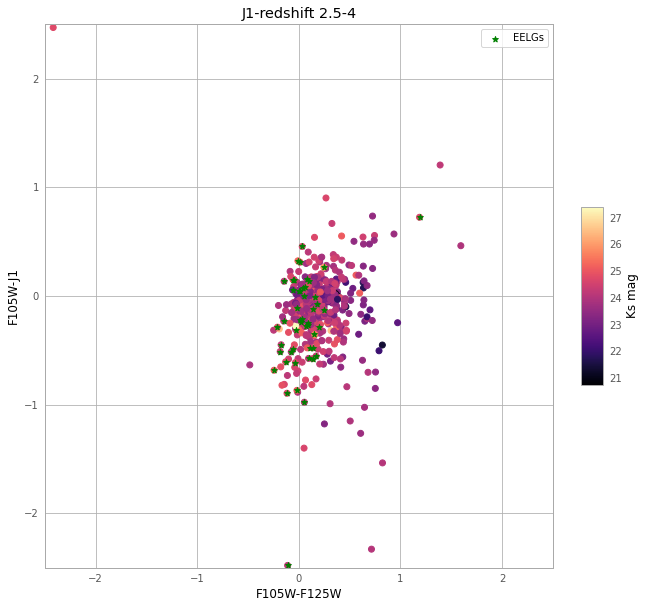

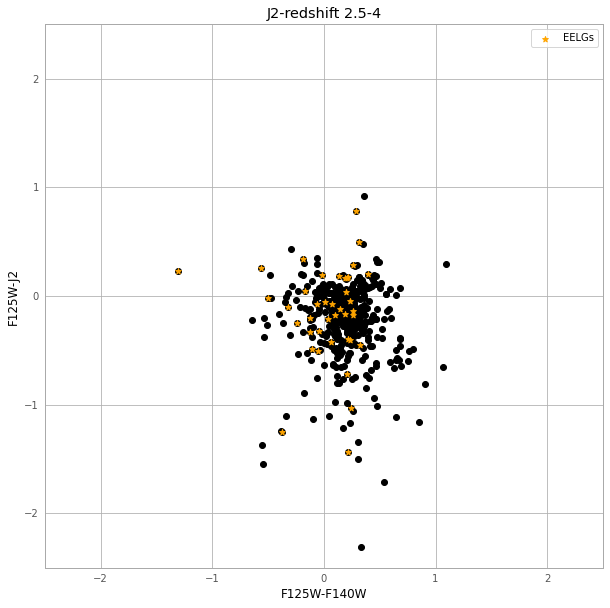

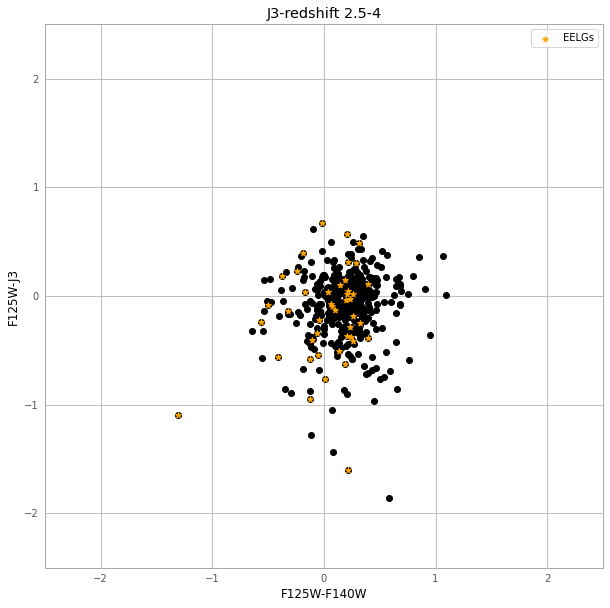

In [12]:
J1= 25-2.5*log10(e['J1'].mul(10**6))
J2= 25-2.5*log10(e['J2'].mul(10**6))
J3= 25-2.5*log10(e['J3'].mul(10**6))
J1b= 25-2.5*log10(EELGs2['J1'].mul(10**6))
J2b= 25-2.5*log10(EELGs2['J2'].mul(10**6))
J3b= 25-2.5*log10(EELGs2['J3'].mul(10**6))

F105W = 25-2.5*log10(e['F105W'].mul(10**6))
F125W = 25-2.5*log10(e['F125W'].mul(10**6))
F140W = 25-2.5*log10(e['F140W'].mul(10**6))
F105Wb = 25-2.5*log10(EELGs2['F105W'].mul(10**6))
F125Wb = 25-2.5*log10(EELGs2['F125W'].mul(10**6))
F140Wb = 25-2.5*log10(EELGs2['F140W'].mul(10**6))

Ks = 25-2.5*log10(e['Ks'].mul(10**6))
# F160W = HayleyWilliams['F160W'].mul(10**6)
plt.figure(figsize=(10,10))
sc=plt.scatter(x=(F105W-F125W),y=(F105W-J1),c=Ks,marker='o',cmap=cm.magma)
plt.colorbar(sc,label='Ks mag',aspect=8,fraction=0.04)
plt.scatter(x=(F105Wb-F125Wb),y=(F105Wb-J1b),c='green',marker='*',label='EELGs')
plt.xlim(-2.5,2.5)
plt.ylim(-2.5,2.5)
plt.xlabel('F105W-F125W')
plt.ylabel('F105W-J1')
plt.title('J1-redshift 2.5-4')
plt.legend()
plt.figure(figsize=(10,10))
plt.scatter(x=(F125W-F140W),y=(F125W-J2),c='black',marker='o')
plt.scatter(x=(F125Wb-F140Wb),y=(F125Wb-J2b),c='orange',marker='*',label='EELGs')
plt.xlim(-2.5,2.5)
plt.ylim(-2.5,2.5)
plt.legend()
plt.xlabel('F125W-F140W')
plt.ylabel('F125W-J2')
plt.title('J2-redshift 2.5-4')
plt.figure(figsize=(10,10))
plt.scatter(x=(F125W-F140W),y=(F125W-J3),c='black',marker='o')
plt.scatter(x=(F125Wb-F140Wb),y=(F125Wb-J3b),c='orange',marker='*',label='EELGs')
plt.xlim(-2.5,2.5)
plt.ylim(-2.5,2.5)
plt.legend()
plt.xlabel('F125W-F140W')
plt.ylabel('F125W-J3')
plt.title('J3-redshift 2.5-4')

In [13]:
len(Hmask[Hmask['Ks']>0]['Ks'])

681

/home/magnus/notebook/jupyterenv/lib/python3.8/site-packages/pandas/core/computation/expressions.py:203: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/home/magnus/notebook/jupyterenv/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/magnus/notebook/jupyterenv/lib/python3.8/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/home/magnus/notebook/jupyterenv/lib/python3.8/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


24.990226108488095


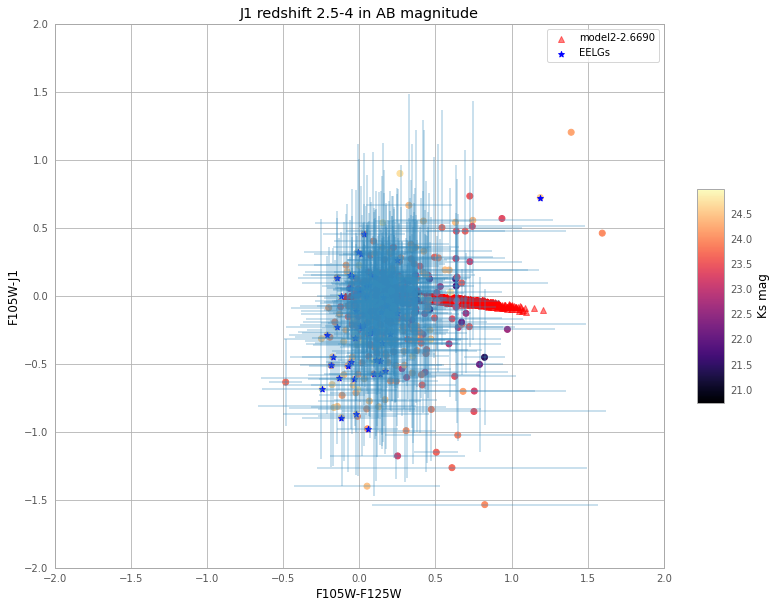

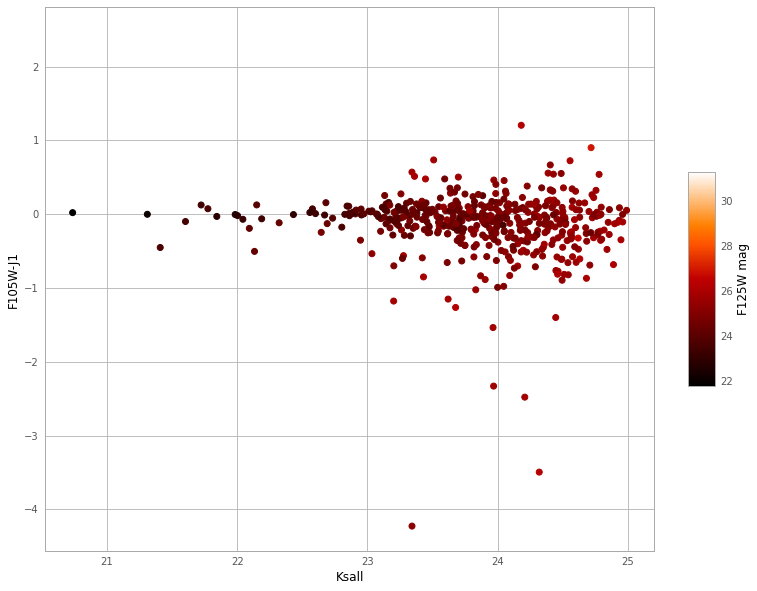

In [61]:
def Offset(flux1,flux2,flux3,flux4,upper,lower,mod,mod2,uplim=2.5,lowlim=-2.5):
    
    Hmask1 = HayleyWilliams['redshift'] <upper
    Hmask2 = HayleyWilliams['redshift'] >lower
    Hmask=HayleyWilliams[Hmask1&Hmask2]
    e1=Hmask['F105W']>0 
    e2=Hmask['F125W']>0
    e3=Hmask['J1']>0
    e4=Hmask['Ksall']>0 #Requires using the file Ksall-Forrest-Hayley.csv
    e = Hmask[e1*e2*e3*e4]

    J1= 25-2.5*log10(e[str(flux1)].mul(10**6))#check the units
    Ks= 25-2.5*log10(e[str(flux4)].mul(10**6))
    
    J1er= e[str(flux1)+'*'].mul(10**6)
    Kser= 25-2.5*log10(e[str(flux4)+'*'].mul(10**6))

    Emask1 = EELGs['redshift'] <upper
    Emask2 = EELGs['redshift'] >lower
    Emask = EELGs[Emask1&Emask2]
    J1b= -2.5*log10(Emask[str(flux1)].mul(10**6))

    F105W = 25-2.5*log10(e[str(flux2)].mul(10**6))
    F125W = 25-2.5*log10(e[str(flux3)].mul(10**6))
    F105Wer = e[str(flux2)+'*'].mul(10**6)
    F125Wer = e[str(flux3)+'*'].mul(10**6)

    F105Wb = -2.5*log10(Emask[str(flux2)].mul(10**6))
    F125Wb = -2.5*log10(Emask[str(flux3)].mul(10**6))

    Yerr = sqrt((J1er**2)*(2.5/e[str(flux1)].mul(10**6))**2 + (F105Wer**2)*(2.5/e[str(flux2)].mul(10**6))**2)
    Xerr = sqrt((F125Wer**2)*(2.5/e[str(flux3)].mul(10**6))**2 + (F105Wer**2)*(2.5/e[str(flux2)].mul(10**6))**2)
    for i in e.index:
        if Yerr[i] > 0.9:
            Yerr[i] = nan
        if Xerr[i] >0.9:
            Xerr[i] = nan
#     for i in e.index:  
#         if Yerr[i] == nan:
#             J1[i]=nan
#             F105W[i]=nan
#             F125W[i]=nan
#             Ks[i]=nan

    path2 = os.path.expanduser('~/Documents/magphys/')
    model=Table.read(os.path.expanduser(path2+'starformhist_bc03_z'+mod+'.lbr'), format ='ascii')
    model = model.to_pandas()
    J1mod=model[str(flux1)]
    F105mod=model[str(flux2)]
    F125mod=model[str(flux3)]
    model2=Table.read(os.path.expanduser(path2+'starformhist_bc03_z'+mod2+'.lbr'), format ='ascii')
    model2 = model2.to_pandas()
    J1mod2=model2[str(flux1)]
    F105mod2=model2[str(flux2)]
    F125mod2=model2[str(flux3)]
    
#     print(Yerr)
    plt.figure(figsize=(12,10))
    plt.errorbar(x=(F105W-F125W),y=(F105W-J1),yerr=Yerr,xerr=Xerr,fmt='none',alpha=0.3)
    plt.scatter(x=(F105mod2-F125mod2),y=(F105mod2-J1mod2),c='red',marker='^',label='model2-'+mod2,alpha=0.5)
#     plt.scatter(x=(F105mod-F125mod),y=(F105mod-J1mod),c='green',marker='^',label='model-'+mod,alpha=0.5)
    sc=plt.scatter(x=(F105W-F125W),y=(F105W-J1),c=Ks,marker='o',cmap=cm.magma,alpha=1)
    plt.colorbar(sc,label='Ks mag',aspect=8,fraction=0.04)
    plt.scatter(x=(F105Wb-F125Wb),y=(F105Wb-J1b),c='blue',marker='*',label='EELGs')
    
    
    plt.xlim(lowlim,uplim)
    plt.ylim(lowlim,uplim)
    plt.xlabel(str(flux2)+'-'+str(flux3))
    plt.ylabel(str(flux2)+'-'+str(flux1))
    plt.title(str(flux1)+' redshift '+str(lower)+'-'+str(upper)+' in AB magnitude')
    plt.legend()
    
    plt.figure(figsize=(12,10))
    sc=plt.scatter(x=Ks,y=F105W-J1,c=F125W)
    plt.colorbar(sc,label='F125W mag',aspect=8,fraction=0.04)
    plt.xlabel(str(flux4))
    plt.ylabel(str(flux2)+'-'+str(flux1))
#     print(25-2.5*log10(e[str(flux4)].mul(10**6).mul(0.3631)))
#     print(Yerr)
#     print(Xerr)
#     print(J1)
    print(max(Ks))
    return
Offset('J1','F105W','F125W','Ksall',4,2.5,'3.2900','2.6690',2,-2)


In [60]:
max(Ks)

27.403894273794272

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'counts')

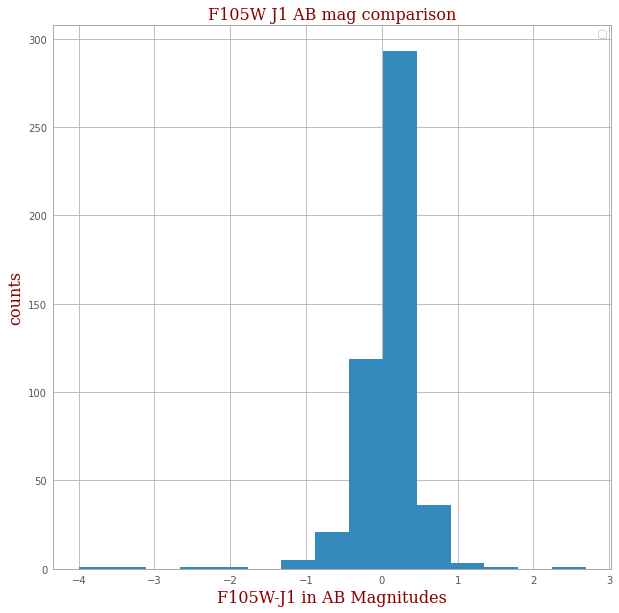

In [38]:
# plt.hist(Ks)
# len(J1)
# fig, axs = plt.subplots(1, 1, figsize=(15, 15), sharex=False, sharey=False,
#                         tight_layout=True)
# # axs[0].hist2d(F105W,J1,bins=15)
# # hist = ax.hist2d(F105W,J1,bins=15)
# # plt.hist2d(F105W,J1,bins=15)
# # plt.figure(figsize=(10,10))
# num_bin = 30
# bin_lims = np.linspace(0,max(F105W),num_bin+1)
# bin_centers = 0.5*(bin_lims[:-1]+bin_lims[1:])
# bin_widths = bin_lims[1:]-bin_lims[:-1]

# ##computing the histograms
# hist1, _ = np.histogram(F105W, bins=bin_lims)
# hist2, _ = np.histogram(J1, bins=bin_lims)
# axs.bar(bin_centers, hist1, width = bin_widths, align = 'center',alpha=0.8)
# axs.bar(bin_centers, hist2, width = bin_widths, align = 'center', alpha = 0.6)
# plt.bar(F105W,bins=15,density=True,align='center')#,alpha=0.5)
# plt.bar(J1,bins=15,density=True,align='center')#,alpha=0.5)
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
plt.figure(figsize=(10,10))
plt.hist(F105W-J1,bins=15,align='right')
plt.legend()
plt.title('F105W J1 AB mag comparison',fontdict=font)
plt.xlabel('F105W-J1 in AB Magnitudes',fontdict=font)
plt.ylabel('counts',fontdict=font)

In [ ]:
cdfshst=Table.read('Matched-Table.csv',format='ascii')
cdfshst=cdfshst.to_pandas()

cdfshst=cdfshst.loc[cdfshst['star'] !=1]
cdfshst=cdfshst.loc[cdfshst['snr'] >10]
cdfshst=cdfshst.loc[cdfshst['nearstar'] !=1]
cdfshst

In [ ]:
testt=cdfshst.loc[:,cdfshst.columns == 'f_F160W_1']#.mul(10**6)
ABABAB=10**(1/2.5) #mag 24
ABABAB2=10**(0.5/2.5) #mag 24.5 #30
FAB = 10**(2/2.5)
FAB2 = 10**(1.5/2.5)
mask = (testt<ABABAB) & (testt>ABABAB2)
mask2 = (testt<FAB) & (testt>FAB2)
testt[mask].notna().value_counts()
testt[mask2].notna().value_counts()

In [ ]:
f160=testt.loc[testt[mask]['f_F160W_1'].notna() == True]
f160b=testt.loc[testt[mask2]['f_F160W_1'].notna() == True]
merged_test=pd.merge(left=f160,right=cdfshst['f_f160w_2'],left_on=f160.index,right_on=cdfshst.index)
merged_testb=pd.merge(left=f160b,right=cdfshst['f_f160w_2'],left_on=f160b.index,right_on=cdfshst.index)
# Cabbage.merge
#Redo this with the matched table from topcat 
#Use the sample for which >zfourge< is 24-24.5, plot the hst and zf 160's
#Redo for 23-23.5, and redo for F140W. 

merged_test

In [ ]:
import numpy as np
import statistics
cov = mean((np.array(merged_test['f_F160W_1'])- mean(np.array(merged_test['f_F160W_1'])))*(np.array(merged_test['f_f160w_2'])- mean(np.array(merged_test['f_f160w_2']))))
Pearson_f160=cov/(statistics.stdev(np.array(merged_test['f_F160W_1']))*(statistics.stdev(np.array(merged_test['f_f160w_2']))))
Pearson_f160
covb = mean((np.array(merged_testb['f_F160W_1'])- mean(np.array(merged_testb['f_F160W_1'])))*(np.array(merged_testb['f_f160w_2'])- mean(np.array(merged_testb['f_f160w_2']))))
Pearson_f160b=covb/(statistics.stdev(np.array(merged_testb['f_F160W_1']))*(statistics.stdev(np.array(merged_testb['f_f160w_2']))))
Pearson_f160b
#cdfshst is the combined file of cdfs and 3dhst. Merged_test is just the selected columns from this.
#need to do a redshift 2.5-4 cut on the cdfshst file, select only the 3 bands (F814W,j1,j2) and plot them as 
#F814W - J1 on x and F814W - J2 on y. Highlight EELG sample from this. 
#I'll need: 
#attach redshifts to cdfshst file. Can do this by first including it in the cdfs file that matches with the hst file 
#in topcat. Then create a 2.5-4 mask as I created the magnitude masks. select only the 3 columns and plot.
#Can make the original file also with the EELG subset vs 3dhst and plot this over top.

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Flux at low and high mag comparison')
plt.xlabel('zfourge F160W flux')
plt.ylabel('3dhst F160W flux')
plt.scatter(merged_test['f_F160W_1'],merged_test['f_f160w_2'],c='black',marker='*',label='24-24.5')#x = zfourge, y = 3dhst
plt.scatter(merged_testb['f_F160W_1'],merged_testb['f_f160w_2'],c='orange',marker='o',label='23-23.5')#x = zfourge, y = 3dhst
plt.legend()
plt.annotate(Pearson_f160, xy=(2,12))
plt.annotate(Pearson_f160b, xy=(4,10))
plt.plot(linspace(1,7,16),linspace(1,7,16))

In [ ]:
# asdsd=Megatronsorted[Megatronsorted['Name']=='F140W']
# bjdsak=Megatronsorted[Megatronsorted['Name']=='F160W']

# aasdsadasdsdadsa=asdsd.append(bjdsak)
# aasdsadasdsdadsa.to_csv('topcatshit.csv')

In [ ]:
TDHST = Table.read(os.path.expanduser(path+'3DHST/goodss_3dhst.v4.1.cats/Catalog/goodss_3dhst.v4.1.cat'), format ='ascii')
TDHST2 = TDHST.to_pandas()
TDHST2=TDHST2.drop(['x','y','faper_F160W','eaper_F160W','faper_F140W','eaper_F140W','w_F160W','w_U38',
            'w_U','w_F435W','w_B','w_V','w_F606Wcand','w_F606W','w_R','w_Rc','w_F775W','w_I','w_F814Wcand',
            'w_F850LP','w_F850LPcand','w_F125W','w_J','w_tenisJ','w_F140W','w_H','w_tenisK','w_Ks','w_IRAC1',
            'w_IRAC2','w_IRAC3','w_IRAC4','tot_cor','wmin_ground','wmin_hst','wmin_wfc3','wmin_irac','z_spec'
            ,'star_flag','kron_radius','a_image','b_image','theta_J2000','class_star','flux_radius','fwhm_image',
            'flags','IRAC1_contam','IRAC2_contam','IRAC3_contam','IRAC4_contam','contam_flag','f140w_flag','use_phot',
            'near_star','nexp_f125w','nexp_f140w','nexp_f160w'],axis=1)
# TDHST2

In [ ]:
a=TDHST2[TDHST2['id']==22420].drop(['id','ra','dec'],axis=1)
# plt.scatter(x=linspace(1,40,40),y=a.iloc[:,::2])
# a
# for col in a.iloc[:,::2].columns:
#     print(col)

In [ ]:
Megatron3D = pd.DataFrame({'Name': pd.Series(dtype='str'),
                   '$\lambda_c$': pd.Series(dtype='float'),
                   'Filter_ID': pd.Series(dtype='int'),
                      'Fit?':pd.Series(dtype='int')})#Removed the unused filters and will sort them by wavelength below
d = {'Name': ['f_F160W','f_U38','f_U','f_F435W','f_B','f_V','f_F606Wcand','f_F606W','f_R','f_Rc','f_F775W','f_I'
              ,'f_F814Wcand','f_F850LP','f_F850LPcand','f_F125W','f_J','f_tenisJ','f_F140W','f_H','f_tenisK',
              'f_Ks','f_IRAC1','f_IRAC2','f_IRAC3','f_IRAC4','f_IA427','f_IA445','f_IA505','f_IA527','f_IA550',
              'f_IA574','f_IA598','f_IA624','f_IA651','f_IA679','f_IA738','f_IA767','f_IA797','f_IA856'], 
     '$\lambda_c$': [1.5396,0.3637,0.3750,0.4318,0.4563,0.5396,0.5921,0.5919,
                 0.6443,0.6517,0.7693,0.7838,0.8057,0.9036,0.9033,1.2471,
                 1.2356,1.2530,1.3924,1.6496,2.1574,2.1667,3.5569,4.5020,5.7450,7.9158,
                 0.4260,0.4443,0.5061,0.5259,0.5495,0.5763,0.6007,0.6231,0.6498,0.6782,0.7359
                ,0.7680,0.7966,0.8565],
     'Filter ID':[330,249,363,214,250,251,215,215,364,252,216,253,126,127,127,328,211,277,329,212,279,
                  213,153,154,155,156,265,205,268,269,206,279,568,271,569,272,274,275,570,571],
     'Fit?':[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]}

Megatron3D = pd.DataFrame(data=d)
Megatronsorted3D=Megatron3D.sort_values(by=['$\lambda_c$'])
Megatronsorted3D=Megatronsorted3D.reset_index(drop=True)
pd.set_option('display.max_rows', 40)
#USING Suprime B and V for Subaru Suprime 445 and 550
##########################################
Sanity2 = Megatronsorted3D['Name']
# Sanity
WhyAreYou2 = 2.9
MyRemedy2 = a[Megatronsorted3D['Name']]
MyClarity2 = a[Sanity2]
#########################################
Megatronsorted3D['Name'] = Megatronsorted3D['Name'].str.replace('f_','')
# Megatronsorted3D #Same as FilterH in this file

In [ ]:
# MyClarity2
# # HayleyWilliams.loc[HayleyWilliams['id']==15111]
# rockmelon=HayleyWilliams.iloc[HayleyWilliams.loc[HayleyWilliams['id']==15111].index[0],2:len(HayleyWilliams.iloc[0])][::2]
# plt.figure(figsize=(10,8))
# plt.scatter(x=Filter[r'$\lambda_c$'],y=rockmelon*10**6,c='black',marker='*') #zfourge
# plt.scatter(x=Megatronsorted3D[r'$\lambda_c$'],y=MyClarity2,c='orange',marker='o') #3dhst
# plt.ylim(0,3)
# # rockmelon
q=a.drop(['f_F160W'],axis=1)
# # print(q.iloc[:,::2])

In [ ]:
# Combined = Table.read(os.path.expanduser(path+'3DHST/CDFS_3DHST_full.csv'),format='ascii')
# Comb = Combined.to_pandas()
# Comb = Comb.drop(['x','y','faper_F160W','eaper_F160W','faper_F140W','eaper_F140W','w_F160W','w_U38',
#             'w_U','w_F435W','w_B','w_V','w_F606Wcand','w_F606W','w_R','w_Rc','w_F775W','w_I','w_F814Wcand',
#             'w_F850LP','w_F850LPcand','w_F125W','w_J','w_tenisJ','w_F140W','w_H','w_tenisK','w_Ks','w_IRAC1',
#             'w_IRAC2','w_IRAC3','w_IRAC4','tot_cor','wmin_ground','wmin_hst','wmin_wfc3','wmin_irac','z_spec'
#             ,'star_flag','kron_radius','a_image','b_image','theta_J2000','class_star','flux_radius','fwhm_image',
#             'flags','IRAC1_contam','IRAC2_contam','IRAC3_contam','IRAC4_contam','contam_flag','f140w_flag','use_phot',
#             'near_star','nexp_f125w','nexp_f140w','nexp_f160w'],axis=1)
# Megatronx = pd.DataFrame({'Name': pd.Series(dtype='str'),
#                    '$\lambda_c$': pd.Series(dtype='float'),
#                    'Filter_ID': pd.Series(dtype='int'),
#                       'Fit?':pd.Series(dtype='int')})#Removed the unused filters and will sort them by wavelength below
# d = {'Name': ['B','I','R','U','V','Z','Ks','F125W',
#               'F140W','F160W','IA527','IA574','IA598','IA624','IA651','IA679',
#               'IA738','IA767','IA797','IA856','WFI_Rc','WFI_U38','tenisK',
#               'IRAC_36','IRAC_45','IRAC_58','IRAC_80'], 
#      '$\lambda_c$': [0.4318,0.7693,0.6443,0.3749,0.5919,0.9036,
#                  2.1538,1.2471,1.3924,1.5396,0.5259,0.5763,0.6007,0.6231,
#                  0.6498,0.6782,0.7359,0.7680,0.7966,0.8565,0.6494,
#                  0.3686,2.1574,3.5569,4.5020,5.7450,7.9158],
#     'e_Name':['B*','I*','R*','U*','V*','Z*','Ks*','F125W*',
#               'F140W*','F160W*','IA527*','IA574*','IA598*','IA624*','IA651*','IA679*',
#               'IA738*','IA767*','IA797*','IA856*','WFI_Rc*','WFI_U38*','tenisK*',
#               'IRAC_36*','IRAC_45*','IRAC_58*','IRAC_80*']}
# Megatronx = pd.DataFrame(data=d)
# Megatronsortedx=Megatronx.sort_values(by=['$\lambda_c$'])
# Megatronsortedx

In [ ]:
Megatron3D2 = pd.DataFrame({'Name': pd.Series(dtype='str'),
                   '$\lambda_c$': pd.Series(dtype='float'),
                   'Filter_ID': pd.Series(dtype='int'),
                      'Fit?':pd.Series(dtype='int')})#Removed the unused filters and will sort them by wavelength below
d = {'Name': ['f_F160W','f_U38','f_U','f_F435W','f_F606W','f_R','f_Rc','f_F775W'
              ,'f_F850LP','f_F125W','f_F140W','f_tenisK',
              'f_Ks','f_IRAC1','f_IRAC2','f_IRAC3','f_IRAC4','f_IA527',
              'f_IA574','f_IA598','f_IA624','f_IA651','f_IA679','f_IA738','f_IA767','f_IA797','f_IA856'], 
     '$\lambda_c$': [1.5396,0.3686,0.3749,0.4329,0.5921,
                 0.6443,0.6494,0.7693,0.9031,1.2471,
                 1.3924,2.1434,2.1538,3.5569,4.5020,5.7450,7.9158,
                 0.5260,0.5763,0.6007,0.6232,0.6498,0.6782,0.7359
                ,0.7680,0.7966,0.8565],
    'e_Name': ['e_F160W','e_U38','e_U','e_F435W','e_F606W','e_R','e_Rc','e_F775W'
              ,'e_F850LP','e_F125W','e_F140W','e_tenisK',
              'e_Ks','e_IRAC1','e_IRAC2','e_IRAC3','e_IRAC4','e_IA527',
              'e_IA574','e_IA598','e_IA624','e_IA651','e_IA679','e_IA738','e_IA767','e_IA797','e_IA856']}#IA445 and IA550 not found- using base numbers,
#      'Filter ID':[214,216,364,363,215,217,438,439,434,435,436,440,572,573,365,366,328,
#               329,330,126,267,269,270,568,271,569,272,
#               274,275,570,571,251,252,249,279,368,
#               153,154,155,156],
#      'Fit?':[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]}
Megatron3D2 = pd.DataFrame(data=d)
Megatronsorted3D2=Megatron3D2.sort_values(by=['$\lambda_c$'])
pd.set_option('display.max_rows', 40)

# Megatronsorted3D2=Megatronsorted3D2.reset_index(drop=True)
Megatronsorted3D2

In [ ]:
Sanity3 = Megatronsorted3D2['Name']
blah=Megatronsorted3D2['e_Name']
# Sanity
# WhyAreYou3 = 2.9
# MyRemedy3 = a[Megatronsorted3D2['Name']]
MyClarity3 = a[Sanity3]
MyRemody3= q[blah]
Sanity4 = Megatronsortedx['Name']
blah2=Megatronsortedx['e_Name']
# # Sanity
# WhyAreYou4 = 2.9
# MyRemedy4 = Cabbage.loc[Cabbage['id']==15111][Megatronsortedx['Name']]
MyClarity4 = HayleyWilliams.loc[HayleyWilliams['id']==15111][Sanity4]
MyRemody4=HayleyWilliams.loc[HayleyWilliams['id']==15111][blah2]

In [ ]:
Megatronsortedx[r'$\lambda_c$'].to_csv('lambda_zfourge.csv')
Megatronsorted3D2[r'$\lambda_c$'].to_csv('lambda_hst.csv')
pot=MyClarity4.T*10**6
pot.to_csv('y_zfourge.csv')
pot2=MyClarity3.T
pot2.to_csv('y_hst.csv')
poter=MyRemody4.T*10**6
poter.to_csv('yerr_zfourge.csv')
poter2=MyRemody3.T
poter2.to_csv('yerr_hst.csv')

In [ ]:
CDFSHST=pd.merge(left=HayleyWilliams, right=cdfshst, left_on='id', right_on='id_1')
EELGHST=pd.merge(left=stuff, right=CDFSHST, left_on='id', right_on='id')
EELGHST
Cmask1 = CDFSHST['redshift'] <4
Cmask2 = CDFSHST['redshift'] >2.5
Cmask=CDFSHST[Cmask1&Cmask2]
Cmask

In [ ]:
J1c= Cmask['f_J1']
J2c= Cmask['f_J2']
J3c= Cmask['f_J3']
J1d= EELGHST['f_J1']
J2d= EELGHST['f_J2']
J3d= EELGHST['f_J3']

F850LPc = Cmask['f_f850lp']
F125Wc = Cmask['f_f125w_2']
F140Wc = Cmask['f_f140w_2']
F850LPd = EELGHST['f_f850lp']
F125Wd = EELGHST['f_f125w_2']
F140Wd = EELGHST['f_f140w_2']
# F160W = HayleyWilliams['F160W'].mul(10**6)
plt.figure(figsize=(10,10))
plt.scatter(x=(F850LPc-F125Wc),y=(F850LPc-J1c),c='black',marker='o')
plt.scatter(x=(F850LPd-F125Wd),y=(F850LPd-J1d),c='orange',marker='*',label='EELGs')
plt.xlim(-2.5,2.5)
plt.ylim(-2.5,2.5)
plt.xlabel('F850LP-F125W')
plt.ylabel('F850LP-J1')
plt.title('J1-redshift 2.5-4 - 3DHST vs ZFourge')
plt.legend()
plt.figure(figsize=(10,10))
plt.scatter(x=(F125Wc-F140Wc),y=(F125Wc-J2c),c='black',marker='o')
plt.scatter(x=(F125Wd-F140Wd),y=(F125Wd-J2d),c='orange',marker='*',label='EELGs')
plt.xlim(-2.5,2.5)
plt.ylim(-2.5,2.5)
plt.legend()
plt.xlabel('F125W-F140W')
plt.ylabel('F125W-J2')
plt.title('J2-redshift 2.5-4- 3DHST vs ZFourge')
plt.figure(figsize=(10,10))
plt.scatter(x=(F125Wc-F140Wc),y=(F125Wc-J3c),c='black',marker='o')
plt.scatter(x=(F125Wd-F140Wd),y=(F125Wd-J3d),c='orange',marker='*',label='EELGs')
plt.xlim(-2.5,2.5)
plt.ylim(-2.5,2.5)
plt.legend()
plt.xlabel('F125W-F140W')
plt.ylabel('F125W-J3')
plt.title('J3-redshift 2.5-4- 3DHST vs ZFourge')